📌 All Students with Department


,name,age,dept_name
0,Aarav,20,Computer Science
1,Meera,21,Mathematics
2,Ishaan,19,Physics
3,Diya,22,Economics
4,Kabir,20,Computer Science
5,Sneha,21,Mathematics


📌 Student Enrollments with Courses and Professors


,student,course_name,professor,grade
0,Aarav,Database Systems,Dr. Sharma,A
1,Aarav,Linear Algebra,Dr. Iyer,B+
2,Meera,Linear Algebra,Dr. Iyer,A-
3,Meera,Machine Learning,Dr. Sharma,B
4,Ishaan,Quantum Mechanics,Dr. Bose,B
5,Diya,Microeconomics,Dr. Rao,A
6,Kabir,Database Systems,Dr. Sharma,B
7,Kabir,Machine Learning,Dr. Sharma,A
8,Sneha,Linear Algebra,Dr. Iyer,A
9,Sneha,Microeconomics,Dr. Rao,B+


📌 Professor Teaching Load (number of courses)


,professor,courses_taught
0,Dr. Bose,1
1,Dr. Iyer,1
2,Dr. Rao,1
3,Dr. Sharma,2


📌 Popular Courses (by enrollment count)


,course_name,total_students
0,Linear Algebra,3
1,Microeconomics,2
2,Machine Learning,2
3,Database Systems,2
4,Quantum Mechanics,1


📌 Department-wise Grade Distribution


,dept_name,grade,count
0,Computer Science,A,2
1,Computer Science,B,1
2,Computer Science,B+,1
3,Economics,A,1
4,Mathematics,A,1
5,Mathematics,A-,1
6,Mathematics,B,1
7,Mathematics,B+,1
8,Physics,B,1


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


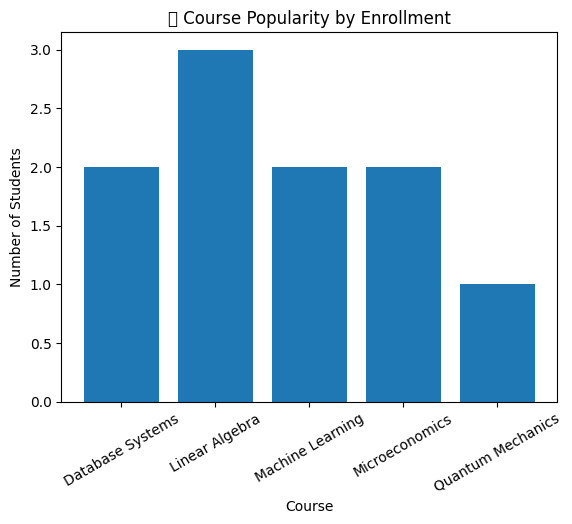

from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('dept_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('grade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['grade'].value_counts()
    for x_label, grp in _df_4.groupby('dept_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('dept_name')
_ = plt.ylabel('grade')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['dept_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='count', y='dept_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['grade'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='count', y='grade', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# -------------------------------------------
# University Management SQL Project
# -------------------------------------------

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite (in-memory)
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# ----------------------
# 1. Create Tables
# ----------------------
cursor.execute("""
CREATE TABLE Departments (
    dept_id INTEGER PRIMARY KEY,
    dept_name TEXT
);
""")

cursor.execute("""
CREATE TABLE Professors (
    prof_id INTEGER PRIMARY KEY,
    name TEXT,
    dept_id INTEGER,
    FOREIGN KEY(dept_id) REFERENCES Departments(dept_id)
);
""")

cursor.execute("""
CREATE TABLE Students (
    student_id INTEGER PRIMARY KEY,
    name TEXT,
    age INTEGER,
    dept_id INTEGER,
    FOREIGN KEY(dept_id) REFERENCES Departments(dept_id)
);
""")

cursor.execute("""
CREATE TABLE Courses (
    course_id INTEGER PRIMARY KEY,
    course_name TEXT,
    credits INTEGER,
    prof_id INTEGER,
    FOREIGN KEY(prof_id) REFERENCES Professors(prof_id)
);
""")

cursor.execute("""
CREATE TABLE Enrollments (
    enrollment_id INTEGER PRIMARY KEY,
    student_id INTEGER,
    course_id INTEGER,
    grade TEXT,
    FOREIGN KEY(student_id) REFERENCES Students(student_id),
    FOREIGN KEY(course_id) REFERENCES Courses(course_id)
);
""")

# ----------------------
# 2. Insert Sample Data
# ----------------------
departments = [
    (1, "Computer Science"),
    (2, "Mathematics"),
    (3, "Physics"),
    (4, "Economics")
]

professors = [
    (1, "Dr. Sharma", 1),
    (2, "Dr. Iyer", 2),
    (3, "Dr. Bose", 3),
    (4, "Dr. Rao", 4)
]

students = [
    (1, "Aarav", 20, 1),
    (2, "Meera", 21, 2),
    (3, "Ishaan", 19, 3),
    (4, "Diya", 22, 4),
    (5, "Kabir", 20, 1),
    (6, "Sneha", 21, 2),
]

courses = [
    (101, "Database Systems", 4, 1),
    (102, "Machine Learning", 4, 1),
    (103, "Linear Algebra", 3, 2),
    (104, "Quantum Mechanics", 4, 3),
    (105, "Microeconomics", 3, 4)
]

enrollments = [
    (1, 1, 101, "A"),
    (2, 1, 103, "B+"),
    (3, 2, 103, "A-"),
    (4, 2, 102, "B"),
    (5, 3, 104, "B"),
    (6, 4, 105, "A"),
    (7, 5, 101, "B"),
    (8, 5, 102, "A"),
    (9, 6, 103, "A"),
    (10, 6, 105, "B+")
]

cursor.executemany("INSERT INTO Departments VALUES (?, ?);", departments)
cursor.executemany("INSERT INTO Professors VALUES (?, ?, ?);", professors)
cursor.executemany("INSERT INTO Students VALUES (?, ?, ?, ?);", students)
cursor.executemany("INSERT INTO Courses VALUES (?, ?, ?, ?);", courses)
cursor.executemany("INSERT INTO Enrollments VALUES (?, ?, ?, ?);", enrollments)
conn.commit()

# ----------------------
# 3. Utility Function
# ----------------------
def run_query(query):
    return pd.read_sql_query(query, conn)

# ----------------------
# 4. Example Queries
# ----------------------

print("📌 All Students with Department")
display(run_query("""
SELECT s.name, s.age, d.dept_name
FROM Students s
JOIN Departments d ON s.dept_id = d.dept_id;
"""))

print("📌 Student Enrollments with Courses and Professors")
display(run_query("""
SELECT s.name AS student, c.course_name, p.name AS professor, e.grade
FROM Enrollments e
JOIN Students s ON e.student_id = s.student_id
JOIN Courses c ON e.course_id = c.course_id
JOIN Professors p ON c.prof_id = p.prof_id;
"""))

print("📌 Professor Teaching Load (number of courses)")
display(run_query("""
SELECT p.name AS professor, COUNT(c.course_id) AS courses_taught
FROM Professors p
LEFT JOIN Courses c ON p.prof_id = c.prof_id
GROUP BY p.name;
"""))

print("📌 Popular Courses (by enrollment count)")
display(run_query("""
SELECT c.course_name, COUNT(e.student_id) AS total_students
FROM Courses c
LEFT JOIN Enrollments e ON c.course_id = e.course_id
GROUP BY c.course_name
ORDER BY total_students DESC;
"""))

print("📌 Department-wise Grade Distribution")
display(run_query("""
SELECT d.dept_name, e.grade, COUNT(*) AS count
FROM Enrollments e
JOIN Students s ON e.student_id = s.student_id
JOIN Departments d ON s.dept_id = d.dept_id
GROUP BY d.dept_name, e.grade;
"""))

# ----------------------
# 5. Visualization
# ----------------------

# Course popularity chart
df = run_query("""
SELECT c.course_name, COUNT(e.student_id) AS total_students
FROM Courses c
LEFT JOIN Enrollments e ON c.course_id = e.course_id
GROUP BY c.course_name;
""")

plt.bar(df['course_name'], df['total_students'])
plt.title("📊 Course Popularity by Enrollment")
plt.xlabel("Course")
plt.ylabel("Number of Students")
plt.xticks(rotation=30)
plt.show()


📌 GPA Calculation per Student


,name,GPA
0,Aarav,3.65
1,Diya,4.00
2,Ishaan,3.00
3,Kabir,3.50
4,Meera,3.35
5,Sneha,3.65


📌 Department Average GPA


,dept_name,Dept_GPA
0,Computer Science,3.575
1,Economics,4.000
2,Mathematics,3.500
3,Physics,3.000


📌 Most Borrowed Books in Library


,title,times_borrowed
0,Linear Algebra,2
1,AI Basics,2
2,Quantum Physics,1
3,Economics 101,1


📌 Club Participation


,club_name,members
0,Drama Club,2
1,Math Club,2
2,Robotics Club,2


📌 Scholarships Awarded


,name,amount
0,Aarav,1000.0
1,Ishaan,800.0
2,Sneha,1200.0


📌 Students with Perfect Attendance (>90%)


,name,course_name,attendance_pct
0,Aarav,Database Systems,92.5
1,Diya,Microeconomics,95.0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


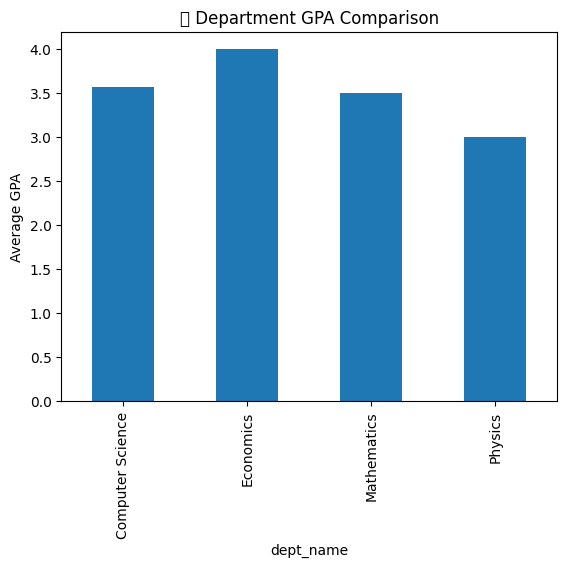

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
_df_0['attendance_pct'].plot(kind='hist', bins=20, title='attendance_pct')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('course_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['attendance_pct']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'attendance_pct'}, axis=1)
              .sort_values('attendance_pct', ascending=True))
  xs = counted['attendance_pct']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('attendance_pct', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('attendance_pct')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['attendance_pct']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'attendance_pct'}, axis=1)
              .sort_values('attendance_pct', ascending=True))
  xs = counted['attendance_pct']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('attendance_pct', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('course_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='course_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('attendance_pct')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['attendance_pct'].plot(kind='line', figsize=(8, 4), title='attendance_pct')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['course_name'].value_counts()
    for x_label, grp in _df_6.groupby('name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('name')
_ = plt.ylabel('course_name')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='attendance_pct', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['course_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='attendance_pct', y='course_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [2]:
# -------------------------------------------
# University Information System in SQL
# -------------------------------------------

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite (in-memory DB)
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# ----------------------
# 1. Core Tables
# ----------------------
cursor.execute("CREATE TABLE Departments (dept_id INTEGER PRIMARY KEY, dept_name TEXT);")
cursor.execute("CREATE TABLE Professors (prof_id INTEGER PRIMARY KEY, name TEXT, dept_id INTEGER, FOREIGN KEY(dept_id) REFERENCES Departments(dept_id));")
cursor.execute("CREATE TABLE Students (student_id INTEGER PRIMARY KEY, name TEXT, age INTEGER, dept_id INTEGER, FOREIGN KEY(dept_id) REFERENCES Departments(dept_id));")
cursor.execute("CREATE TABLE Courses (course_id INTEGER PRIMARY KEY, course_name TEXT, credits INTEGER, prof_id INTEGER, FOREIGN KEY(prof_id) REFERENCES Professors(prof_id));")
cursor.execute("CREATE TABLE Enrollments (enrollment_id INTEGER PRIMARY KEY, student_id INTEGER, course_id INTEGER, grade TEXT, FOREIGN KEY(student_id) REFERENCES Students(student_id), FOREIGN KEY(course_id) REFERENCES Courses(course_id));")

# ----------------------
# 2. New Feature Tables
# ----------------------
cursor.execute("CREATE TABLE Library (book_id INTEGER PRIMARY KEY, title TEXT, author TEXT, copies INTEGER);")
cursor.execute("CREATE TABLE Borrowings (borrow_id INTEGER PRIMARY KEY, student_id INTEGER, book_id INTEGER, FOREIGN KEY(student_id) REFERENCES Students(student_id), FOREIGN KEY(book_id) REFERENCES Library(book_id));")
cursor.execute("CREATE TABLE Clubs (club_id INTEGER PRIMARY KEY, club_name TEXT);")
cursor.execute("CREATE TABLE Memberships (student_id INTEGER, club_id INTEGER, FOREIGN KEY(student_id) REFERENCES Students(student_id), FOREIGN KEY(club_id) REFERENCES Clubs(club_id));")
cursor.execute("CREATE TABLE Scholarships (sch_id INTEGER PRIMARY KEY, student_id INTEGER, amount REAL, FOREIGN KEY(student_id) REFERENCES Students(student_id));")
cursor.execute("CREATE TABLE Attendance (att_id INTEGER PRIMARY KEY, student_id INTEGER, course_id INTEGER, attendance_pct REAL, FOREIGN KEY(student_id) REFERENCES Students(student_id), FOREIGN KEY(course_id) REFERENCES Courses(course_id));")

# ----------------------
# 3. Insert Data
# ----------------------
departments = [(1,"Computer Science"),(2,"Mathematics"),(3,"Physics"),(4,"Economics")]
professors = [(1,"Dr. Sharma",1),(2,"Dr. Iyer",2),(3,"Dr. Bose",3),(4,"Dr. Rao",4)]
students = [(1,"Aarav",20,1),(2,"Meera",21,2),(3,"Ishaan",19,3),(4,"Diya",22,4),(5,"Kabir",20,1),(6,"Sneha",21,2)]
courses = [(101,"Database Systems",4,1),(102,"Machine Learning",4,1),(103,"Linear Algebra",3,2),(104,"Quantum Mechanics",4,3),(105,"Microeconomics",3,4)]
enrollments = [(1,1,101,"A"),(2,1,103,"B+"),(3,2,103,"A-"),(4,2,102,"B"),(5,3,104,"B"),(6,4,105,"A"),(7,5,101,"B"),(8,5,102,"A"),(9,6,103,"A"),(10,6,105,"B+")]

library = [(1,"AI Basics","Goodfellow",3),(2,"Linear Algebra","Strang",2),(3,"Quantum Physics","Feynman",4),(4,"Economics 101","Krugman",3)]
borrowings = [(1,1,1),(2,2,2),(3,3,3),(4,4,4),(5,5,1),(6,6,2)]
clubs = [(1,"Robotics Club"),(2,"Math Club"),(3,"Drama Club")]
memberships = [(1,1),(2,2),(3,3),(4,3),(5,1),(6,2)]
scholarships = [(1,1,1000.0),(2,3,800.0),(3,6,1200.0)]
attendance = [(1,1,101,92.5),(2,2,102,85.0),(3,3,104,76.0),(4,4,105,95.0),(5,5,101,88.0),(6,6,103,90.0)]

cursor.executemany("INSERT INTO Departments VALUES (?,?);",departments)
cursor.executemany("INSERT INTO Professors VALUES (?,?,?);",professors)
cursor.executemany("INSERT INTO Students VALUES (?,?,?,?);",students)
cursor.executemany("INSERT INTO Courses VALUES (?,?,?,?);",courses)
cursor.executemany("INSERT INTO Enrollments VALUES (?,?,?,?);",enrollments)
cursor.executemany("INSERT INTO Library VALUES (?,?,?,?);",library)
cursor.executemany("INSERT INTO Borrowings VALUES (?,?,?);",borrowings)
cursor.executemany("INSERT INTO Clubs VALUES (?,?);",clubs)
cursor.executemany("INSERT INTO Memberships VALUES (?,?);",memberships)
cursor.executemany("INSERT INTO Scholarships VALUES (?,?,?);",scholarships)
cursor.executemany("INSERT INTO Attendance VALUES (?,?,?,?);",attendance)
conn.commit()

# ----------------------
# 4. Utility
# ----------------------
def run_query(query): return pd.read_sql_query(query, conn)

# ----------------------
# 5. Advanced Queries
# ----------------------

print("📌 GPA Calculation per Student")
display(run_query("""
SELECT s.name,
AVG(CASE grade
        WHEN 'A' THEN 4.0
        WHEN 'A-' THEN 3.7
        WHEN 'B+' THEN 3.3
        WHEN 'B' THEN 3.0
    END) AS GPA
FROM Enrollments e
JOIN Students s ON e.student_id=s.student_id
GROUP BY s.name;
"""))

print("📌 Department Average GPA")
display(run_query("""
SELECT d.dept_name,
AVG(CASE grade
        WHEN 'A' THEN 4.0
        WHEN 'A-' THEN 3.7
        WHEN 'B+' THEN 3.3
        WHEN 'B' THEN 3.0
    END) AS Dept_GPA
FROM Enrollments e
JOIN Students s ON e.student_id=s.student_id
JOIN Departments d ON s.dept_id=d.dept_id
GROUP BY d.dept_name;
"""))

print("📌 Most Borrowed Books in Library")
display(run_query("""
SELECT l.title, COUNT(b.borrow_id) AS times_borrowed
FROM Borrowings b
JOIN Library l ON b.book_id=l.book_id
GROUP BY l.title
ORDER BY times_borrowed DESC;
"""))

print("📌 Club Participation")
display(run_query("""
SELECT c.club_name, COUNT(m.student_id) AS members
FROM Memberships m
JOIN Clubs c ON m.club_id=c.club_id
GROUP BY c.club_name;
"""))

print("📌 Scholarships Awarded")
display(run_query("""
SELECT s.name, sc.amount
FROM Scholarships sc
JOIN Students s ON sc.student_id=s.student_id;
"""))

print("📌 Students with Perfect Attendance (>90%)")
display(run_query("""
SELECT s.name, c.course_name, a.attendance_pct
FROM Attendance a
JOIN Students s ON a.student_id=s.student_id
JOIN Courses c ON a.course_id=c.course_id
WHERE a.attendance_pct > 90;
"""))

# ----------------------
# 6. Visualization
# ----------------------

# GPA by Department
df = run_query("""
SELECT d.dept_name,
AVG(CASE grade
        WHEN 'A' THEN 4.0
        WHEN 'A-' THEN 3.7
        WHEN 'B+' THEN 3.3
        WHEN 'B' THEN 3.0
    END) AS Dept_GPA
FROM Enrollments e
JOIN Students s ON e.student_id=s.student_id
JOIN Departments d ON s.dept_id=d.dept_id
GROUP BY d.dept_name;
""")

df.plot(kind="bar",x="dept_name",y="Dept_GPA",legend=False)
plt.title("📊 Department GPA Comparison")
plt.ylabel("Average GPA")
plt.show()
